# EDA

In [135]:
import pandas as pd
import numpy as np
import datetime

#경고무시
import warnings
warnings.filterwarnings(action='ignore') 

# 그래프 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib.pyplot import style

# 스타일 설정
style.use('seaborn')

# 한글 폰트 설정
if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 음수(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False 

In [136]:
# 파일불러오기
df = pd.read_csv('./cleand preprocessed.csv')
pd.set_option('display.max_columns', 35)
df.head(3)

,구분,악궁구조,나이,성별,비뚠니,1년이내스케일링,사랑니,시린니,구취,치아흔들림,흡연,탄산음료섭취,"잇몸부종,통증",양치시간(분),키(cm),몸무게(kg),하루양치질(회),전체회차,진행된회차,추천칫솔,추천치약,진단년,진단월,진단일,진단시,진단요일,나쁜습관,바뀔 수 없는 구강구조,치아 상황
0,0,1,22,0,0,1,0,1,0,0,0,0,1,2,0,0,2,1,1,클린디 초극세모 칫솔,클린디 달짝 치약 100g 시린이,2022,5,2,10,0,0,0,2
1,0,1,22,0,0,1,0,0,0,0,0,0,0,2,0,0,2,1,1,클린디 기능모 칫솔,클린디 살짝 치약 100g 잇몸,2022,5,2,10,0,0,0,0
2,0,1,33,1,0,0,0,1,0,1,0,0,1,2,0,0,2,1,1,클린디 초극세모 칫솔,클린디 달짝 치약 100g 시린이,2022,5,2,9,0,0,0,3


* dummy 변수 설명

'구분' : 비회원-0, 회원-1  
'악궁구조' : 좁은구강구조-0, 보통구강구조-1, 넓은구강구조-2  
'성별' : 남성-0, 여성-1

'비뚠니' : yes-1, no-0  
'1년이내스케일링' : yes-1, no-0  
'사랑니' : yes-1, no-0  
'시린니' : yes-1, no-0  
'구취' : yes-1, no-0   
'치아흔들림' : yes-1, no-0  
'흡연' : yes-1, no-0  
'탄산음료섭취' : yes-1, no-0  
'잇몸부종,통증' : yes-1, no-0


* 'y' 하나당 각 1점으로 더해서 점수컬럼생성

1. 흡연, 탄산음료섭취, 양치시간 1분이하, 1회이하 -> 나쁜 습관
2. 사랑니, 비뚠이 -> 바뀔 수 없는 구강구조 
3. 구취, 치아 흔들림, 시린니, 잇몸부종 => 치아 상황 

## 1. 결측치확인


In [137]:
df.isnull().sum()  #결측치 없음

구분              0
악궁구조            0
나이              0
성별              0
비뚠니             0
1년이내스케일링        0
사랑니             0
시린니             0
구취              0
치아흔들림           0
흡연              0
탄산음료섭취          0
잇몸부종,통증         0
양치시간(분)         0
키(cm)           0
몸무게(kg)         0
하루양치질(회)        0
전체회차            0
진행된회차           0
추천칫솔            0
추천치약            0
진단년             0
진단월             0
진단일             0
진단시             0
진단요일            0
나쁜습관            0
바뀔 수 없는 구강구조    0
치아 상황           0
dtype: int64

## 2. 데이터 분포 확인

### 2-1 '구분', '악궁구조', '나이', '성별', '비뚠니', '1년이내스케일링', '사랑니'  변수 확인

<AxesSubplot:xlabel='사랑니', ylabel='count'>

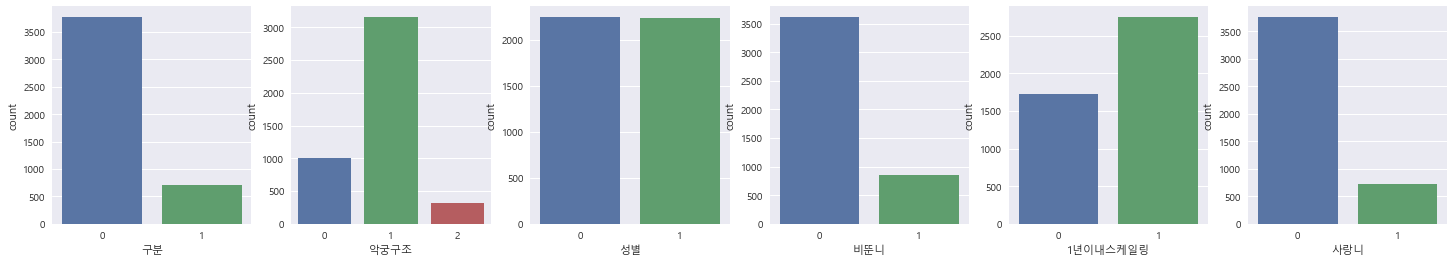

In [138]:
fig, ax = plt.subplots(ncols=6, figsize=(25,4))
sns.countplot(df['구분'], ax=ax[0])
sns.countplot(df['악궁구조'], ax=ax[1])
sns.countplot(df['성별'], ax=ax[2])
sns.countplot(df['비뚠니'], ax=ax[3])
sns.countplot(df['1년이내스케일링'], ax=ax[4])
sns.countplot(df['사랑니'], ax=ax[5])

* 회원 보다 비회원구매가 압도적으로 많음 -> 회원가입 유도 전략이 필요해 보임.
* 악궁구조는 보통 > 좁은 > 넓은 구강구조 순으로 많음. -> 칫솔 개발시 참고 할 만할듯함.
* 성별은 남여 비슷한 비율로 나타남.
* 비뚠니는 없는 사람이 있는사람보다 약 4배 많음.
* 1년 이내 스케일링받은 사람이 안받은 사람보다 약 2배 많음. 치아관리에 기본적으로 관심이 있고 액션이 있는 사람뿐만 아니라 관심을 가지기 시작하는 사람의 유입도 적지 않음.
* 사랑니가 없는 사람이 있는사람보다 6배정도 많음.  

### 2-2 '시린니', '구취', '치아흔들림', '흡연', '탄산음료섭취', '잇몸부종,통증' 변수확인

<AxesSubplot:xlabel='잇몸부종,통증', ylabel='count'>

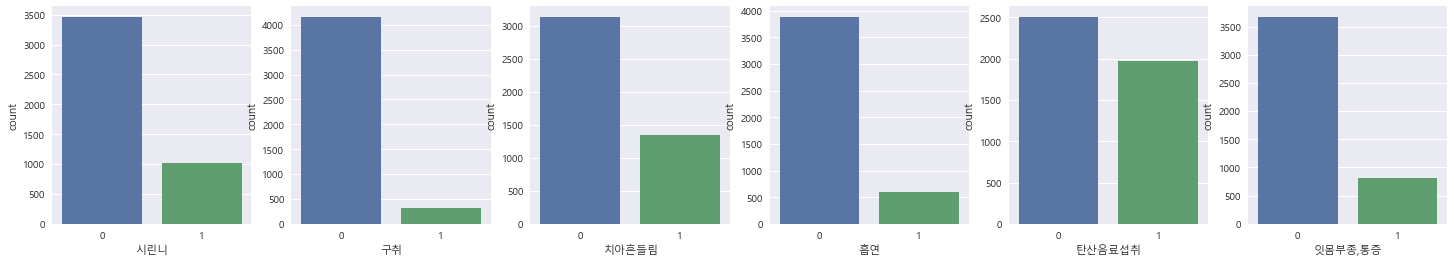

In [139]:
fig, ax = plt.subplots(ncols=6, figsize=(25,4))
sns.countplot(df['시린니'], ax=ax[0])
sns.countplot(df['구취'], ax=ax[1])
sns.countplot(df['치아흔들림'], ax=ax[2])
sns.countplot(df['흡연'], ax=ax[3])
sns.countplot(df['탄산음료섭취'], ax=ax[4])
sns.countplot(df['잇몸부종,통증'], ax=ax[5])

* y축을 확인해 봤을 때, 치아흔들림 > 시린니 > 잇몸부종,통증 > 구치 순으로 증상을 가진 사람이 많았음.
* 흡연은 안하는사람이 약 8배 많음.
* 탄산음료는 마시는사람이 안마시는 사람보다 약간 더 많음.

### 2-3 '양치시간', '키', '몸무게', '하루양치질', '전체회차', '진행된회차' 변수 확인

<AxesSubplot:xlabel='진행된회차', ylabel='count'>

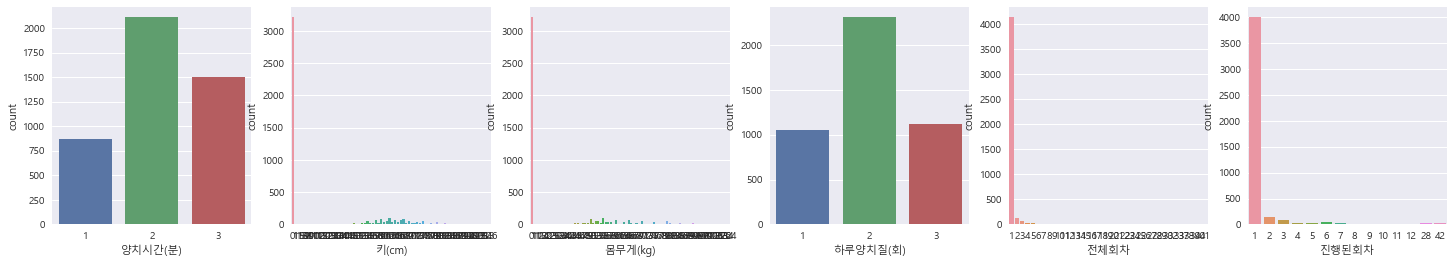

In [140]:
fig, ax = plt.subplots(ncols=6, figsize=(25,4))
sns.countplot(df['양치시간(분)'], ax=ax[0])
sns.countplot(df['키(cm)'], ax=ax[1])
sns.countplot(df['몸무게(kg)'], ax=ax[2])
sns.countplot(df['하루양치질(회)'], ax=ax[3])
sns.countplot(df['전체회차'], ax=ax[4])
sns.countplot(df['진행된회차'], ax=ax[5])

 * 양치시간은 2분 > 3분 > 1분 순으로 많음.
 * 키와 몸무게는 측정되지않은 값인 0이 많아 0을 제거 하고 다시 그려야함.  이후 모델링에서는 정보가 부족해서 두 변수 제외할 예정.
 * 하루양치질 횟수는 2회 > 3회 > 1회 순으로 많음.  
 * 전체회차, 진행된 회차는 박스플롯으로 이상치 확인 후 처리 예정.

In [141]:
df_del = df.drop(df[df['키(cm)'] == 0].index)
df_del = df.drop(df[df['몸무게(kg)'] == 0].index)

<AxesSubplot:xlabel='키(cm)', ylabel='count'>

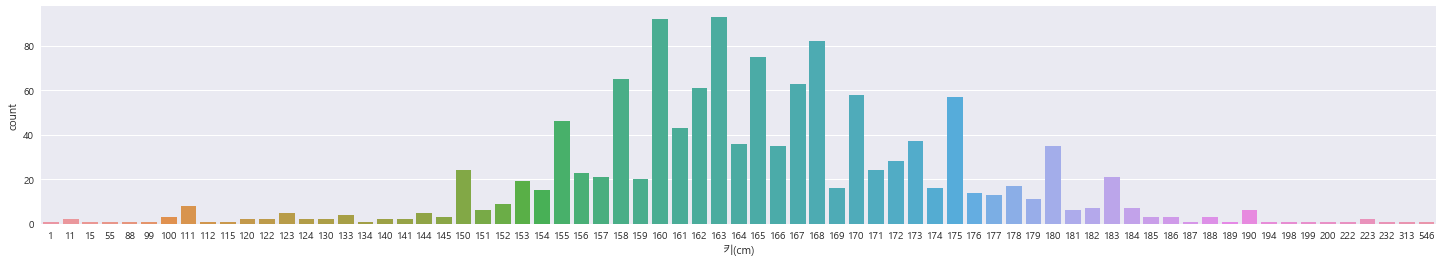

In [142]:
# 0 제외 키의 분포
fig, ax = plt.subplots(figsize=(25,4))
sns.countplot(df_del['키(cm)'])

<AxesSubplot:xlabel='몸무게(kg)', ylabel='count'>

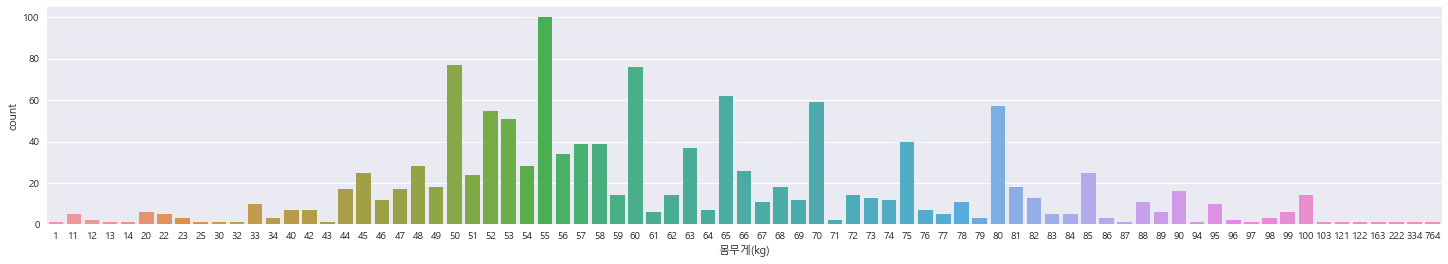

In [143]:
# 0 제외 몸무게 분포
fig, ax = plt.subplots(figsize=(25,4))
sns.countplot(df_del['몸무게(kg)'])

In [144]:
# 키, 몸무게 컬럼 삭제
df = df.drop(columns = ["키(cm)", "몸무게(kg)"])

,구분,악궁구조,나이,성별,비뚠니,1년이내스케일링,사랑니,시린니,구취,치아흔들림,흡연,탄산음료섭취,"잇몸부종,통증",양치시간(분),하루양치질(회),전체회차,진행된회차,추천칫솔,추천치약,진단년,진단월,진단일,진단시,진단요일,나쁜습관,바뀔 수 없는 구강구조,치아 상황
0,0,1,22,0,0,1,0,1,0,0,0,0,1,2,2,1,1,클린디 초극세모 칫솔,클린디 달짝 치약 100g 시린이,2022,5,2,10,0,0,0,2
1,0,1,22,0,0,1,0,0,0,0,0,0,0,2,2,1,1,클린디 기능모 칫솔,클린디 살짝 치약 100g 잇몸,2022,5,2,10,0,0,0,0
2,0,1,33,1,0,0,0,1,0,1,0,0,1,2,2,1,1,클린디 초극세모 칫솔,클린디 달짝 치약 100g 시린이,2022,5,2,9,0,0,0,3
3,0,1,28,1,0,1,0,0,0,1,0,1,0,2,2,1,1,클린디 미세모 칫솔,클린디 반짝 치약 90g 미백,2022,5,2,7,0,1,0,1
4,0,1,28,1,0,1,0,0,0,1,0,1,0,2,2,1,1,클린디 미세모 칫솔,클린디 활짝 치약 100g 충치예방,2022,5,2,7,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,0,1,49,1,0,0,0,0,0,0,0,0,0,1,2,1,1,클린디 기능모 칫솔,클린디 활짝 치약 100g 충치예방,2021,12,1,22,2,1,0,0
4477,0,1,49,1,0,0,0,0,0,0,0,0,0,2,2,1,1,클린디 미세모 칫솔,클린디 활짝 치약 100g 충치예방,2021,12,1,22,2,0,0,0
4478,0,2,50,1,0,0,0,0,0,0,0,0,1,2,3,1,1,클린디 초극세모 칫솔,클린디 살짝 치약 100g 잇몸,2021,12,1,22,2,0,0,1
4479,0,1,48,1,0,0,0,0,0,0,0,0,0,2,2,1,1,클린디 미세모 칫솔,클린디 활짝 치약 100g 충치예방,2021,12,1,22,2,0,0,0


<AxesSubplot:xlabel='진행된회차', ylabel='count'>

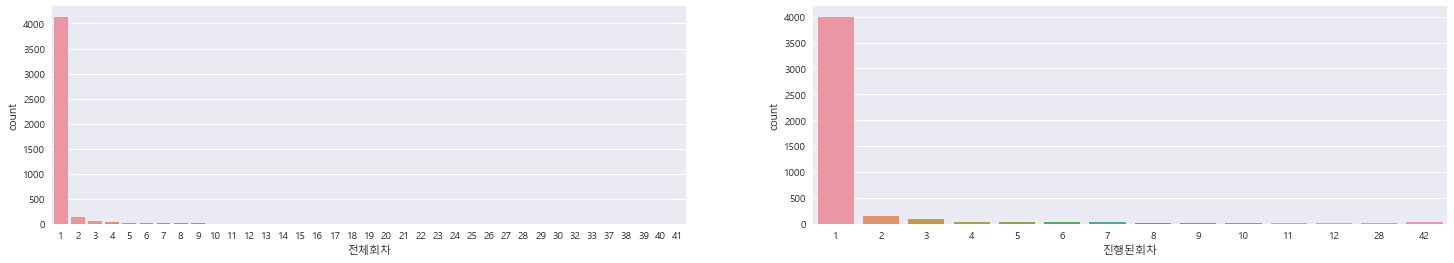

In [145]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.countplot(df['전체회차'], ax=ax[0])
sns.countplot(df['진행된회차'], ax=ax[1])

<AxesSubplot:xlabel='진행된회차'>

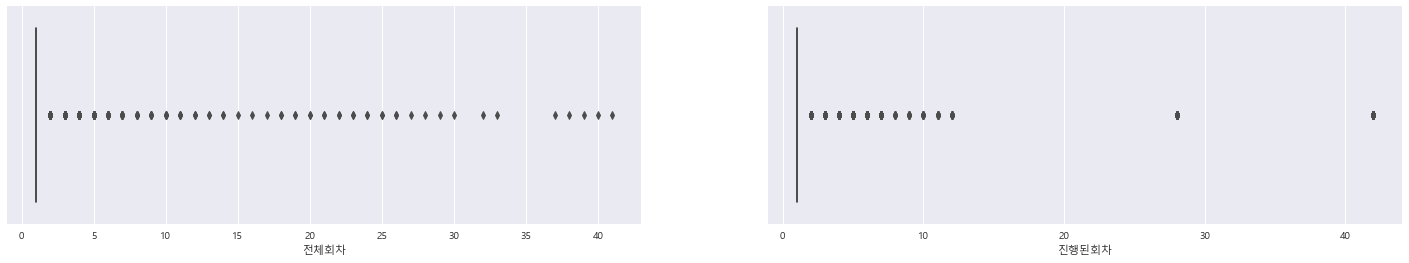

In [146]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.boxplot(x = "전체회차",  data = df,  ax=ax[0])
sns.boxplot(x = "진행된회차",  data = df, ax=ax[1])

* 막대그래프와 박스플롯을 확인해 봤을때 1이 대부분을 차지하고 있음, 심하게 편향되어 있으므로 정규분포화 시켜주기 위해  
-> 로그변환 시도   
-> 유의미한 변화 없음 ㅜㅜㅜ 처리 고민해보기!!

Skewness: 5.618
Kurtosis: 23.416


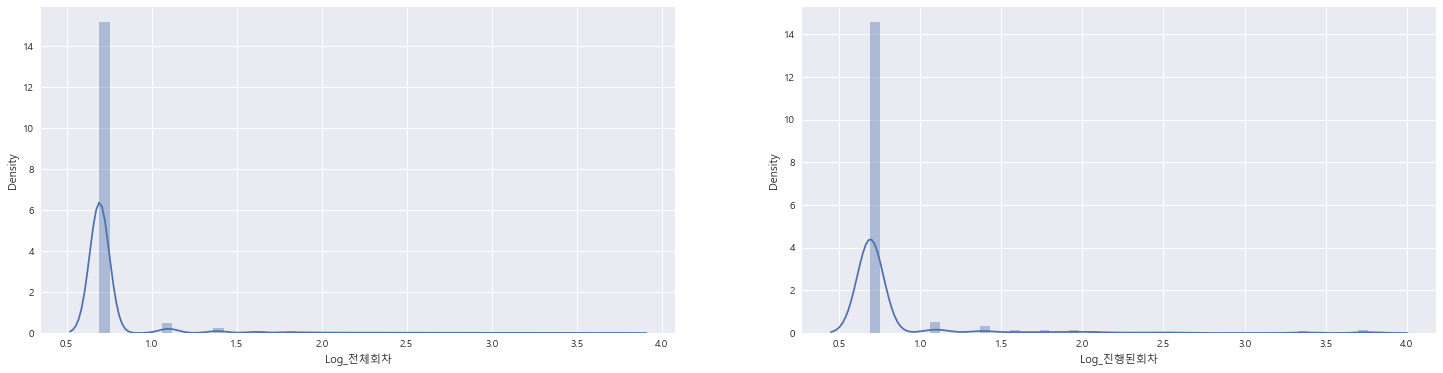

In [148]:
df["Log_전체회차"] = np.log1p(df["전체회차"]) 
df["Log_진행된회차"] = np.log1p(df["진행된회차"]) 

f, ax = plt.subplots(ncols =2, figsize = (25, 6)) 
sns.distplot(df_log["Log_전체회차"], ax=ax[0])
sns.distplot(df_log["Log_진행된회차"], ax=ax[1])

print("Skewness: {:.3f}".format(df["Log_전체회차"].skew())) 
print("Kurtosis: {:.3f}".format(df["Log_진행된회차"].kurt()))

### 2-4 '추천칫솔', ''추천치약' 변수 확인

<AxesSubplot:xlabel='추천치약', ylabel='count'>

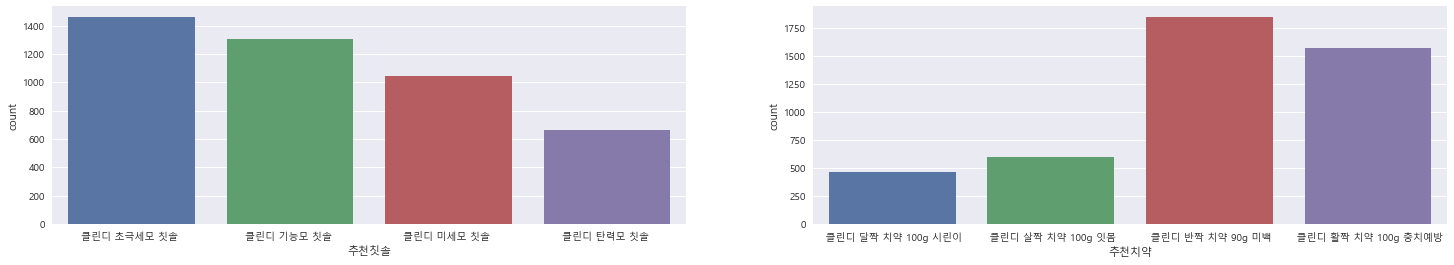

In [149]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.countplot(df['추천칫솔'], ax=ax[0])
sns.countplot(df['추천치약'], ax=ax[1])


* 칫솔은 초극세모 > 기능모 > 미세모 > 탄력모 순으로 추천이 많이 되었음.
* 치약은 달짝 > 살짝 > 반짝 > 활짝 순으로 추천이 많이 되었음.

### 2-5 진단한 연, 월, 일, 시 변수 확인

<AxesSubplot:xlabel='진단요일', ylabel='count'>

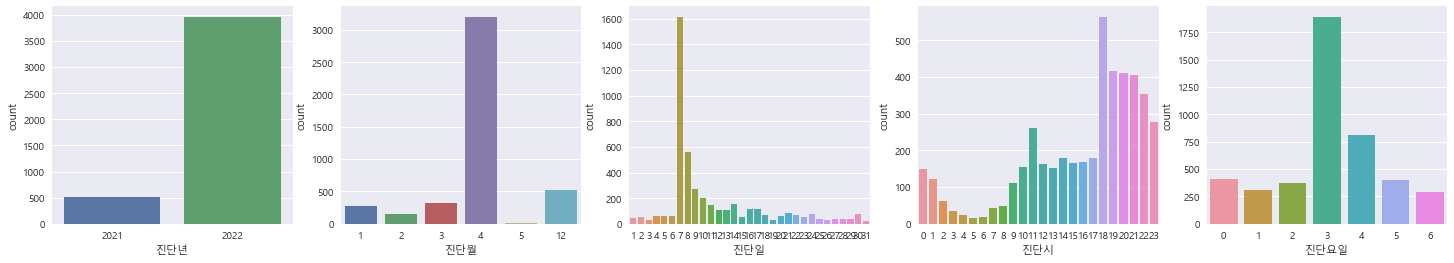

In [150]:
fig, ax = plt.subplots(ncols=5, figsize=(25,4))
sns.countplot(df['진단년'], ax=ax[0])
sns.countplot(df['진단월'], ax=ax[1])
sns.countplot(df['진단일'], ax=ax[2])
sns.countplot(df['진단시'], ax=ax[3])
sns.countplot(df['진단요일'], ax=ax[4])

* 2021년보다 2022년에 유입이 많이 되었음.
* 유입이 4월7일 급증 하고 그 후 감소해서 4월7일 이전과 비슷한 모습을 보임. 4월7일 유튜브 크리에이터와 콜라보했던 영상이 큰 영향을 미친것으로 보임.  
(4.7 네이버 데이터랩기준 검색 100회)
* 저녁,밤시간대인 18시-23시에 유입이 많이 되었음.  
* 목요일이 가장 진단을 많이 한것으로 보이나 4월7일이 목요일인것을 감안하면 요일별 특성은 없는것으로 보임 (0:월, 1:화 ...)

### 2-6 '나쁜습관', '바뀔수 없는 구강구조', '치아상황' 변수 확인

<AxesSubplot:xlabel='치아 상황', ylabel='count'>

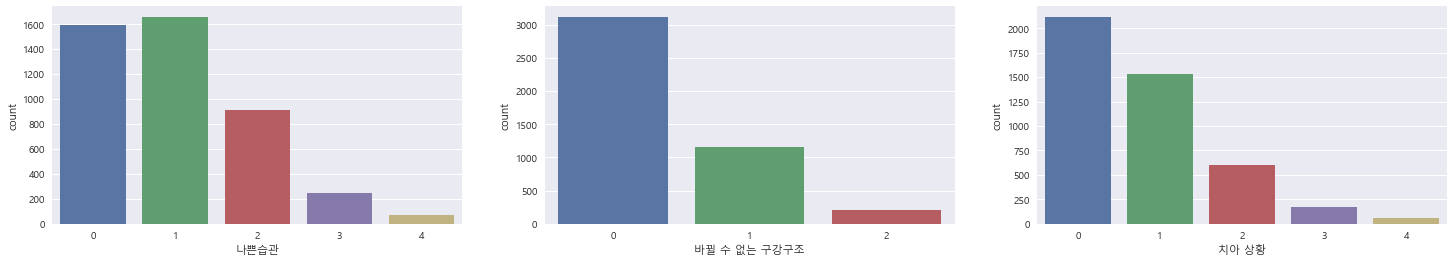

In [151]:
fig, ax = plt.subplots(ncols=3, figsize=(25,4))
sns.countplot(df['나쁜습관'], ax=ax[0])
sns.countplot(df['바뀔 수 없는 구강구조'], ax=ax[1])
sns.countplot(df['치아 상황'], ax=ax[2])

* 나쁜 습관은 0~2개 가진 사람이 대부분임.
* 빠뀔수 없는 구강구조는 0~1개 가진 사람이 대부분임.
* 구강 관련 증상을 0~2개 가진 사람이 대부분임. 

### 2-7 '나이' 변수 확인

<AxesSubplot:xlabel='나이', ylabel='count'>

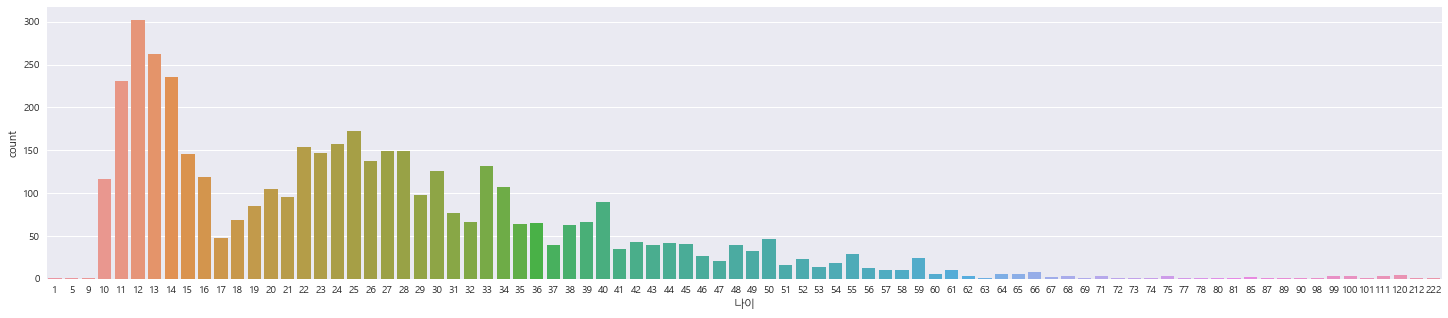

In [152]:
plt.figure(figsize = (25,5))
sns.countplot(df['나이'])

* 대부분 10대 초반과 20대의 유입이 많은 편.
* 오른쪽으로 꼬리가 길고 100살 이상인 수치가 있어 이상치 확인 후 처리가 필요해 보임.

<AxesSubplot:xlabel='나이'>

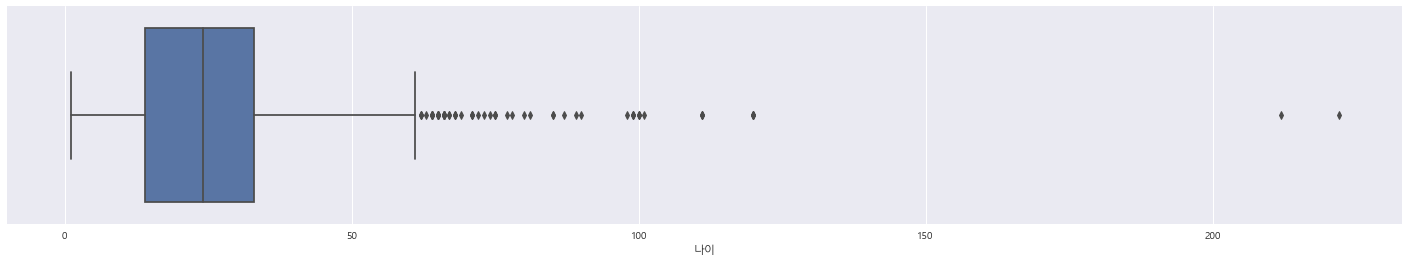

In [ ]:
fig, ax = plt.subplots(figsize=(25,4))
sns.boxplot(x = "나이",  data = df)

In [153]:
# 이상치 확인
IQR= df.quantile(0.75) - df.quantile(0.25)
df['나이'].quantile(0.75)+(1.5*IQR)  # 나이가 61.5 이상일때 이상치

# 이상치 제거
df = df.drop(df[df['나이'] > 61.5].index)
df

# 나이 이상치 제거 후 행의 수가 4481 -> 4416개로 줄어듦.

,구분,악궁구조,나이,성별,비뚠니,1년이내스케일링,사랑니,시린니,구취,치아흔들림,흡연,탄산음료섭취,"잇몸부종,통증",양치시간(분),하루양치질(회),전체회차,진행된회차,추천칫솔,추천치약,진단년,진단월,진단일,진단시,진단요일,나쁜습관,바뀔 수 없는 구강구조,치아 상황,Log_전체회차,Log_진행된회차
0,0,1,22,0,0,1,0,1,0,0,0,0,1,2,2,1,1,클린디 초극세모 칫솔,클린디 달짝 치약 100g 시린이,2022,5,2,10,0,0,0,2,0.693147,0.693147
1,0,1,22,0,0,1,0,0,0,0,0,0,0,2,2,1,1,클린디 기능모 칫솔,클린디 살짝 치약 100g 잇몸,2022,5,2,10,0,0,0,0,0.693147,0.693147
2,0,1,33,1,0,0,0,1,0,1,0,0,1,2,2,1,1,클린디 초극세모 칫솔,클린디 달짝 치약 100g 시린이,2022,5,2,9,0,0,0,3,0.693147,0.693147
3,0,1,28,1,0,1,0,0,0,1,0,1,0,2,2,1,1,클린디 미세모 칫솔,클린디 반짝 치약 90g 미백,2022,5,2,7,0,1,0,1,0.693147,0.693147
4,0,1,28,1,0,1,0,0,0,1,0,1,0,2,2,1,1,클린디 미세모 칫솔,클린디 활짝 치약 100g 충치예방,2022,5,2,7,0,1,0,1,0.693147,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,0,1,49,1,0,0,0,0,0,0,0,0,0,1,2,1,1,클린디 기능모 칫솔,클린디 활짝 치약 100g 충치예방,2021,12,1,22,2,1,0,0,0.693147,0.693147
4477,0,1,49,1,0,0,0,0,0,0,0,0,0,2,2,1,1,클린디 미세모 칫솔,클린디 활짝 치약 100g 충치예방,2021,12,1,22,2,0,0,0,0.693147,0.693147
4478,0,2,50,1,0,0,0,0,0,0,0,0,1,2,3,1,1,클린디 초극세모 칫솔,클린디 살짝 치약 100g 잇몸,2021,12,1,22,2,0,0,1,0.693147,0.693147
4479,0,1,48,1,0,0,0,0,0,0,0,0,0,2,2,1,1,클린디 미세모 칫솔,클린디 활짝 치약 100g 충치예방,2021,12,1,22,2,0,0,0,0.693147,0.693147


<AxesSubplot:xlabel='나이', ylabel='count'>

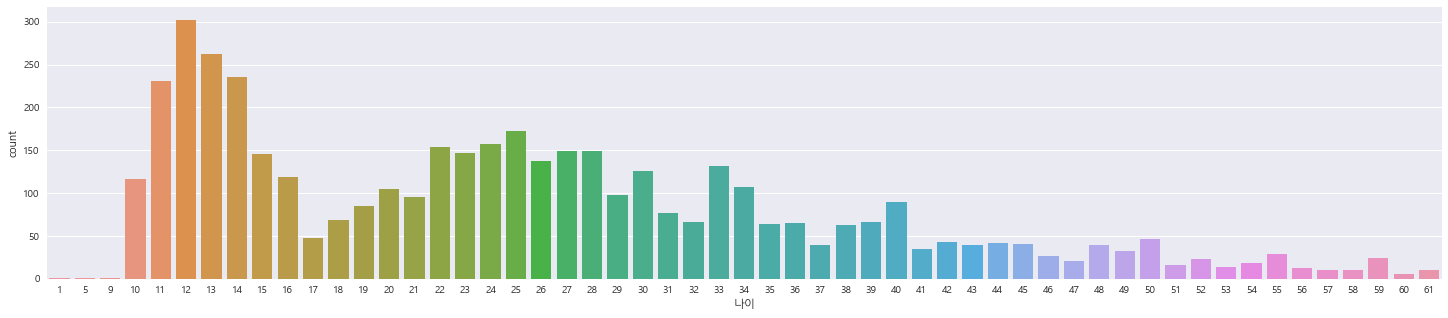

In [154]:
plt.figure(figsize = (25,5))
sns.countplot(df['나이'])

* 긴꼬리 모양이므로 로그변환으로 정규화 시도

Skewness: 0.736
Kurtosis: -0.139
Skewness: -0.022
Kurtosis: -0.876


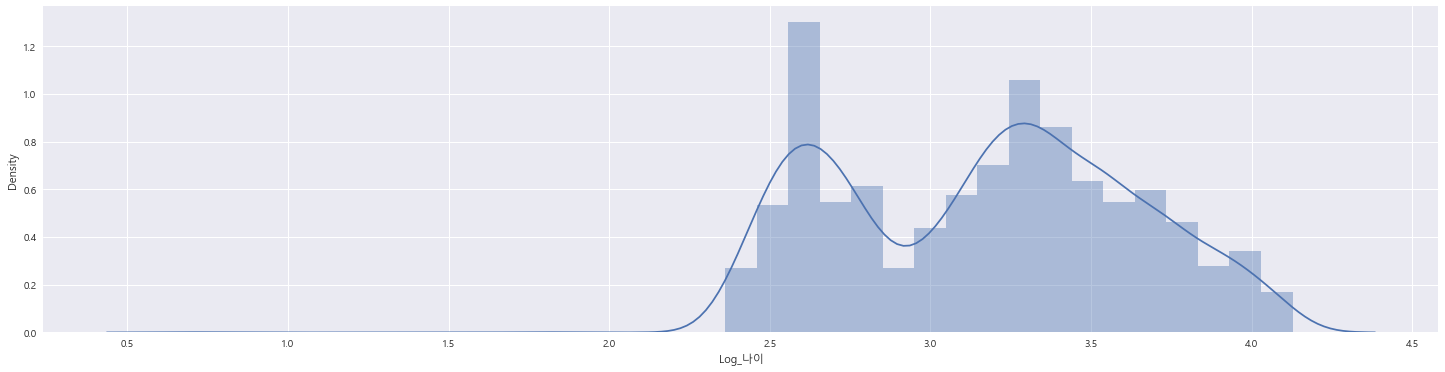

In [155]:
df["Log_나이"] = np.log1p(df["나이"]) 

f, ax = plt.subplots(figsize = (25, 6)) 
sns.distplot(df["Log_나이"])

print("Skewness: {:.3f}".format(df["나이"].skew())) 
print("Kurtosis: {:.3f}".format(df["나이"].kurt()))
print("Skewness: {:.3f}".format(df["Log_나이"].skew())) 
print("Kurtosis: {:.3f}".format(df["Log_나이"].kurt()))

* 왜도, 첨도가 줄어든것을 알 수있음.
* 쌍봉형태로 보임.

## 3. 상관관계 확인

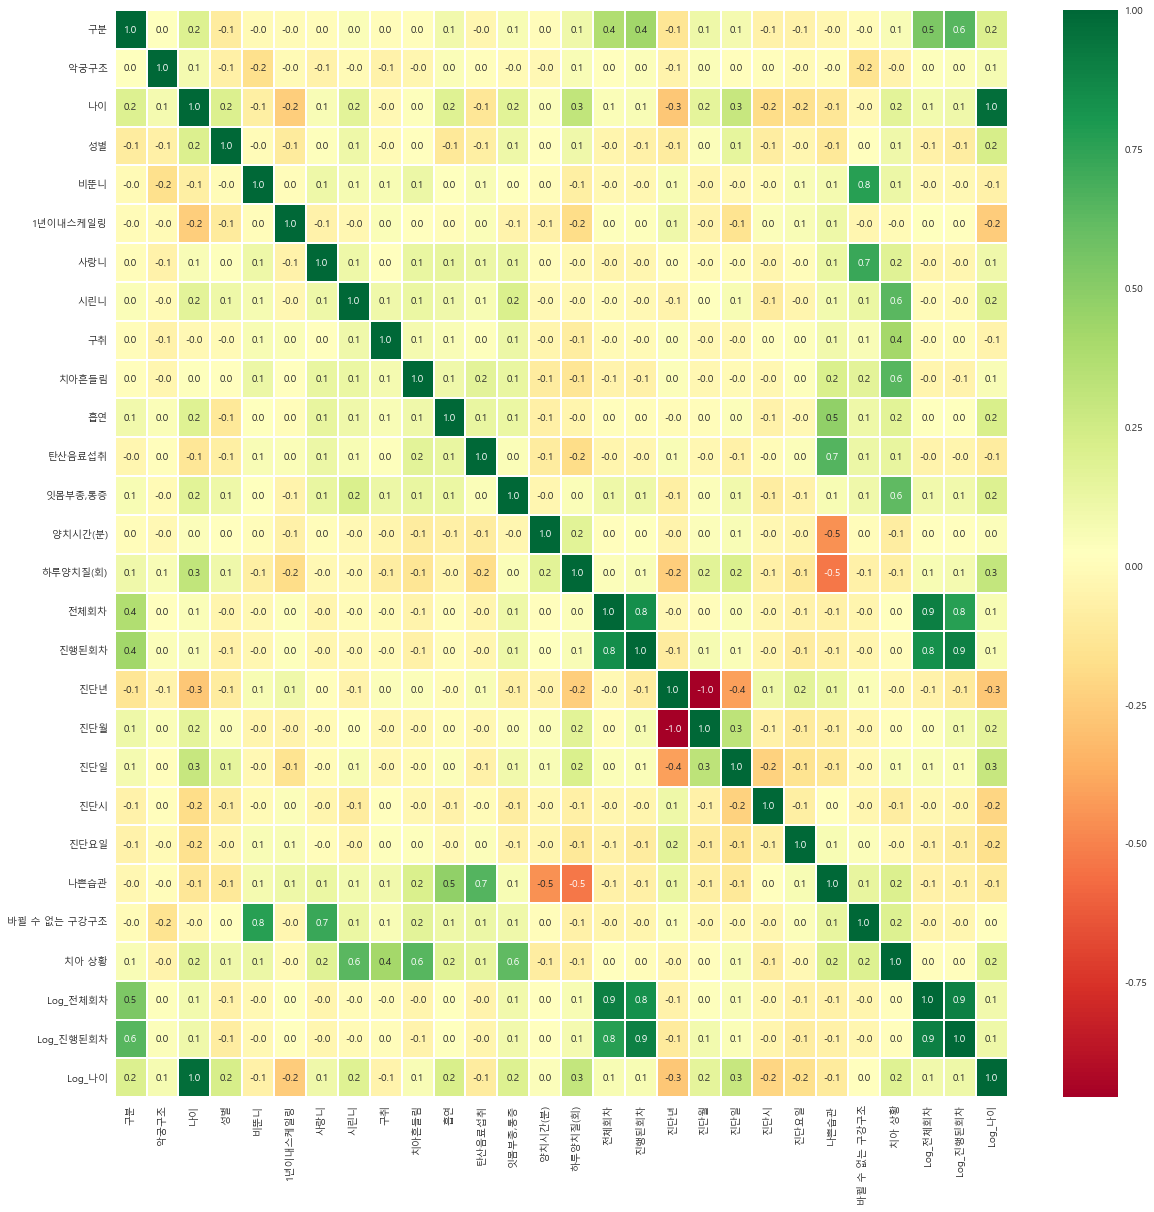

In [156]:
f, ax = plt.subplots(figsize = (20, 20)) 
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,  fmt = '.1f') 
plt.show()

* 상관계수가 0.7 이상인 변수들은?  
~~~

-> 변수들 끼리 상관성이 있으면 모델 해석이 어려우므로 미리 처리할 필요가 있음
-> 각 쌍의 변수들 중에 target값과 더 상관성이 있는 변수를 제거

In [ ]:
# 삭제할 변수 지정
del_list = []
# 변수 삭제

df = df.drop(del_list, axis=1)

### 데이터의 한계  
이미 비식별화 되었는 데이터이므로 중복인 사람을 알 수 없음.  
한 사람이 여러번 진단받은 경우의 처리가 불가함.  
키, 몸무게 데이터를 쓸 수 없음.

### 논의 필요
진단 월 : 계절성 체크여부  
진단 시 : 오전 오후 저녁 밤 새벽 컬럼 추가 여부 -> 모델링 시에 도움 될것 같음  
전체회차, 진행된 회차 : 편향된 데이터를 어떻게 처리 할 것인가? 로그변환 말고 다른 정규화 방법 써보기
